In [1]:
import os
import sys
sys.path.insert(0, os.path.realpath('__file__'))

import numpy as np
import matplotlib.pyplot as plt
import pyEMA

The experiment is shown in the figure below; the beam was excited at 6 locations with a impact hammer, while the response was measured at 7 locations using piezo accelerometers (camera data is not used in this showcase; for image EMA, see https://github.com/ladisk/ImageBasedModalAnalysisTutorial):
<img width=500 src="./data/experiment_1.jpg">

Loading experimental data:

In [2]:
freq, H1_main = np.load("./data/acc_data.npy", allow_pickle=True)

Frequency vector was truncated for zero frequency:

In [3]:
freq[:10]

array([ 1.00019535,  2.0003907 ,  3.00058605,  4.0007814 ,  5.00097675,
        6.0011721 ,  7.00136745,  8.00156281,  9.00175816, 10.00195351])

And from the FRF (`H1_main` is of dimensions: #inputs, #outputs, frequency) only the response accelerometer position at index 1 will be later used:

In [4]:
selected_response = 1
FRF = H1_main[:,selected_response,:]

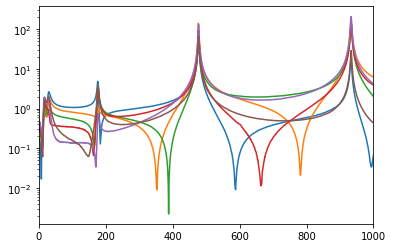

In [5]:
plt.semilogy(freq, np.abs(FRF.T));
plt.xlim(0,1000);

Initiate the pyEMA object:

In [6]:
acc = pyEMA.Model(frf=FRF, 
                 freq=freq,
                 lower=10, 
                 upper=5000,
                 pol_order_high=60)

Get the poles:

In [7]:
acc.get_poles()

100%|███████████████████████████████████████████████████████████████| 60/60 [00:01<00:00, 48.91it/s]


Select stable poles from stabilisation chart:

In [37]:
acc.stab_chart(acc.all_poles, legend = True)

100%|███████████████████████████████████████████████████████████████| 60/60 [00:01<00:00, 35.00it/s]


SHIFT + LEFT mouse button to pick a pole.
SHIFT + RIGHT mouse button to erase the last pick.
1. Frequency: ~168 -->	176.0501901082247 Hz	(xi = 0.0086)
2. Frequency: ~494 -->	476.5099078393186 Hz	(xi = 0.0019)
3. Frequency: ~935 -->	932.2524358402935 Hz	(xi = 0.0015)
4. Frequency: ~1537 -->	1534.7798194110414 Hz	(xi = 0.0020)
5. Frequency: ~2294 -->	2286.3494561189773 Hz	(xi = 0.0028)
6. Frequency: ~3177 -->	3162.259027442895 Hz	(xi = 0.0016)
7. Frequency: ~4180 -->	4181.908254381126 Hz	(xi = 0.0015)


<Figure size 432x288 with 0 Axes>

Alternatively to selecting from stabilisation chart, the frequencies can be defines as a list, e.g. (comment out to use):

In [38]:
#n_freq =  [176,476,932,1534,2258,3161,4180]
#acc.select_closest_poles(n_freq)

Reconstruction of FRF

In [39]:
frf_rec, modal_const = acc.get_constants(whose_poles='own', FRF_ind='all')

The selected natural frequencies and corresponding damping factors:

In [40]:
acc.print_modal_data()

   Nat. f.      Damping
-----------------------
1)  176.1	0.0086
2)  476.5	0.0019
3)  932.3	0.0015
4) 1534.8	0.0020
5) 2286.3	0.0028
6) 3162.3	0.0016
7) 4181.9	0.0015


Modal constants and residuals (last but one is the lower residual, last one is the upper residual):

In [41]:
acc.A[:,:3]

array([[    7.57252462-4.44740417e+01j,     1.21101274+5.78819833e+00j,
           -5.52183602+3.30615738e+01j],
       [  143.02552479-4.16892171e+02j,  -276.29528321+7.23825919e+02j,
         -229.90257224+4.66525980e+02j],
       [   32.77928592-1.67890324e+02j,  -273.11307886+1.76931821e+03j,
          369.67020444-1.19920448e+03j],
       [    3.0738766 +3.32561492e+02j,   -17.75744058+5.67134487e+02j,
          136.41931132-1.28668337e+03j],
       [  -12.59668835-1.16144328e+03j,    20.44778355+7.31464738e+02j,
            1.13993764-3.69943262e+02j],
       [ -347.2424237 -4.68417240e+03j,   388.71328897+5.86129889e+03j,
          -80.8302454 -6.68502550e+03j],
       [-1055.84705489-7.69968908e+03j,   882.94176078+8.59627525e+03j,
         -192.89934916-3.45462821e+03j]])

Imaginary part of modal constants (first three):

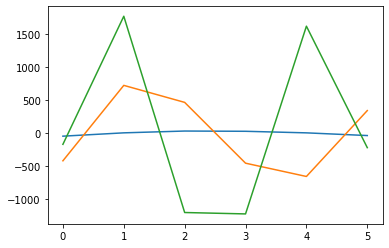

In [42]:
plt.plot(np.imag(acc.A[:3,:]).T);

Check out the Auto Modal Assurance Criterion.

In [45]:
autoMAC = acc.MAC(acc.A,acc.A)

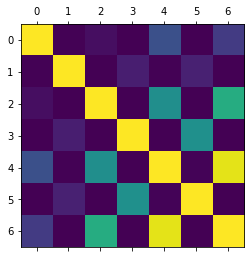

In [46]:
plt.matshow(autoMAC);

Showing the reconstructed FRF

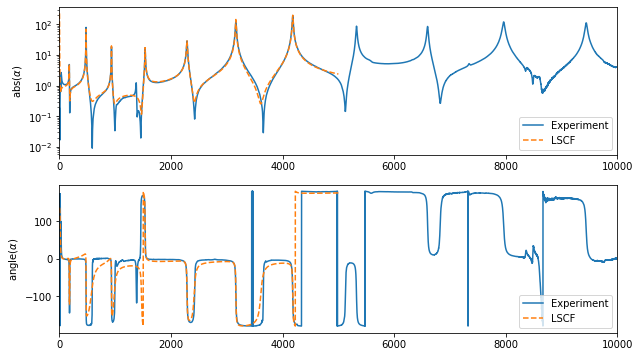

In [47]:
freq_a = acc.freq
select_loc = 0

plt.figure(figsize = ((10,6)))
plt.subplot(211)

plt.semilogy(freq, np.abs(FRF[select_loc]), label='Experiment')
plt.semilogy(freq_a, np.abs(frf_rec[select_loc]),'--', label='LSCF')
plt.xlim(0,freq[-1])
plt.ylabel(r"abs($\alpha$)")

plt.legend(loc = 'best')

plt.subplot(212)
plt.plot(freq, np.angle(FRF[select_loc],deg = 1), label='Experiment')
plt.plot(freq_a, np.angle(frf_rec[select_loc],deg = 1),'--',label='LSCF')
plt.xlim(0,freq[-1])

plt.ylabel(r"angle($\alpha$)")
plt.legend(loc = 'best');